In [13]:
import os
import math 
import numpy as np
import pandas as pd

# Since matplotlib.pyplot is tedious to write,
# access functions using shortcut notation plt instead
import matplotlib.pyplot as plt   

**Get Data** Now we will retreive our data file from the local directory on our computer. The data represents the time taken for the cylinder to roll down the ramp at the given distance.

In [14]:
def data_generator(mean, std, n_measurements = 500, n_samples = 20):
    """
    Generate an array of measurements from a normal distribution.
    
    Parameters
    ----------
    mean : float
        Desired mean value of the measurements.
    std : float
        Desired standard deviation of the measurements.
    n_measurements : int, optional
        Number of separate measurements. Default is 500 measurements.
    n_samples : int, optional
        Number of samples taken per measurement. Default is 20 samples. 
        per measurement.
    
    Returns
    -------
    data : numpy.ndarray
        Array representing the experimental data. Each measurement 
        (composed of many samples) is a row of this array:
                 -----------------------------------
        meas1    | sample0 | sample1 | sample2 | ...
        meas2    | sample0 | sample1 | sample2 | ...
        meas3    | sample0 | sample1 | sample2 | ...
         ...
    """
    return np.random.normal(loc = mean, scale = std, 
                               size = (n_measurements, n_samples))

In [15]:
os.chdir(os.getcwd())
data = pd.read_csv("rolldata.csv", header=None, names=['10cm', '20cm', '30cm', '40cm', '47.825cm'])
data

,10cm,20cm,30cm,40cm,47.825cm
0,1.231,1.972,2.522,2.673,3.323
1,1.298,1.945,2.503,2.719,3.299
2,1.305,1.970,2.545,2.769,3.310
3,1.289,1.836,2.550,2.907,3.313
4,1.273,2.023,2.557,2.968,3.302
5,1.474,2.013,2.764,2.990,3.302
6,1.251,1.946,2.539,2.895,3.304
7,1.431,1.943,2.514,2.896,3.310
8,1.293,1.956,2.509,2.950,3.311
9,1.157,2.019,2.509,2.912,3.298


We have used a **pandas** table in order to show the time measurements for each respective distance.
Now we will find the mean and standard deviations for our time trials.

In [16]:
# the mean
meandata = np.mean(data)
meandata

10cm        1.29925
20cm        1.97090
30cm        2.52280
40cm        2.92145
47.825cm    3.29765
dtype: float64

In [17]:
# the standard deviation
stddata = np.std(data, ddof=1)
stddata

10cm        0.068486
20cm        0.056384
30cm        0.063871
40cm        0.120335
47.825cm    0.013554
dtype: float64

**Discussion** Does the mean and standard deviation of our data coincide with our originally calculated results? Yes. Although, if one were to use the **np.std()** method without declaring the degrees of freedom **ddof** then the standard deviation data would have been underestimated. If the latter was the case, then the data calculated with python would not have matched our earlier calculations.

**Data Generator** We will now use the the **data_generator()** method to produce simulated rolling data. After generating the simulated data, we import the data in a pandas **DataFrame** for easier viewing. 

In [18]:
simdata = data_generator(meandata[1], stddata[1])
simdataTable = pd.DataFrame(simdata)
simdataTable

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.994108,2.033288,1.975693,1.973322,1.865210,2.047255,1.915582,2.052459,1.939189,2.016124,2.004699,1.964198,1.961085,2.014975,1.972847,1.932745,1.967140,1.873465,2.036169,1.996485
1,1.943950,1.930754,2.002543,1.840874,1.951410,1.916545,1.941778,2.020367,1.932906,1.860612,1.948985,2.071206,1.960945,1.978372,1.974536,1.987301,1.900699,1.938018,1.995654,1.938403
2,1.940808,1.853860,2.070120,1.931097,2.004200,2.042161,1.988366,2.014915,1.965154,2.056120,2.003728,2.030007,1.827994,1.977431,1.943591,1.984777,2.026640,1.885302,1.947264,1.950985
3,1.995485,1.935730,2.118871,1.918028,1.947354,1.783540,1.941800,1.851711,2.048240,2.037274,2.001140,1.942123,1.984735,1.957863,2.024544,2.008513,1.899538,1.882644,2.049650,1.879999
4,1.973791,2.048614,1.940743,1.974114,1.899223,1.948238,1.988683,1.947515,1.945255,1.928160,1.902604,2.037167,2.015463,2.001046,2.016068,1.969132,2.027502,2.063850,1.969968,1.974790
5,2.043027,1.954142,1.948323,1.943644,1.961313,1.966905,1.972675,1.906180,1.979166,1.986430,1.980030,1.930371,2.018810,1.955847,1.828295,1.903056,2.001437,2.098961,1.985627,1.965500
6,1.889211,2.029964,1.909260,1.958539,1.885351,1.917371,1.922781,2.011428,2.005498,1.992931,1.948709,2.035905,1.976085,1.997155,1.912532,1.978576,2.013580,1.918875,1.860870,1.964160
7,1.974850,1.968297,1.885249,1.961751,2.031511,2.004260,2.046400,2.001214,1.928809,1.943190,1.967997,1.969143,2.012044,1.951421,1.838266,1.910712,1.971612,1.959694,1.962521,1.993201
8,1.985864,2.050317,1.969743,1.956167,1.971159,2.030396,1.909333,1.956392,2.034075,1.909130,1.983135,1.938991,2.017801,1.990387,2.028042,1.989481,1.996835,2.071881,2.001660,2.001676
9,1.977813,2.051793,1.959957,1.923554,1.925121,1.904705,1.854981,1.989078,1.986529,1.997630,1.937108,2.017747,2.042230,1.901646,2.022945,1.916163,2.022825,2.010833,2.007977,2.051646


# Analysis #

## 1. **Histogram of Simulated Data** ##
In order to plot the histogram of the generated data we first flatten the **simdata** by calling the **.flatten()** method on our **simdata** array object.

In [19]:
# flattened simulated data
flatsimdata = simdata.flatten()
flatsimdata

array([ 1.99410755,  2.03328802,  1.97569261, ...,  1.92125586,
        1.96406978,  2.02511747])

We then create the histogram of **flatsimdata** using the **matplotlib.pyplot.hist()** method. We set the bin width to 50.

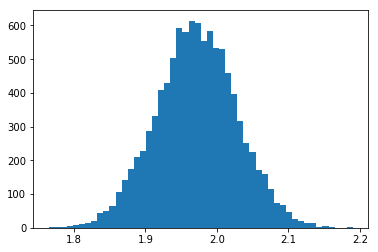

In [20]:
# plot of flattened simulated data
flatsimdata_plot = plt.hist(flatsimdata, 50, histtype='bar')
plt.show(flatsimdata_plot)

In [21]:
# mean and standard deviation of the flattend simualted data
flatsimdata_mean = np.mean(flatsimdata)
flatsimdata_std = np.std(flatsimdata, ddof=1)

# saving the histogram data to an external file
#np.savetxt("histogramdata.txt", )
print("Mean: ", flatsimdata_mean)
print("Standard Deviation: ", flatsimdata_std)

Mean:  1.97120146663
Standard Deviation:  0.056453387857


## 2. Histogram of Simulated Means ##
Now we

In [22]:
# means of each sample set of rolling data
simdata_samplemeans = np.mean(simdata, axis=1)
simdata_samplemeans

array([ 1.97680184,  1.95179285,  1.97222609,  1.96043906,  1.97859624,
        1.96648712,  1.95643909,  1.96410709,  1.98962321,  1.97511409,
        1.99686136,  1.97480165,  1.99023427,  1.96743505,  1.96892092,
        1.96884642,  1.95256546,  1.95455939,  1.97909132,  1.96546736,
        1.97126343,  1.99132803,  1.97216969,  1.96187798,  1.96460631,
        1.96735734,  1.95632484,  1.96918121,  1.9656253 ,  1.97942771,
        1.97087649,  1.96273143,  1.97819312,  1.98610295,  1.97414218,
        1.97481005,  1.96636582,  1.96833253,  1.98625456,  1.95811328,
        1.94163741,  1.96936769,  1.97579782,  1.98372449,  1.97214809,
        1.97269567,  1.9677721 ,  1.97772883,  1.9607886 ,  1.97783784,
        1.97058364,  1.99151585,  1.95837509,  1.95881213,  1.95736508,
        1.98355152,  1.98101269,  1.97430977,  1.96589655,  1.97131253,
        1.96098692,  1.96204419,  1.97750576,  1.98801531,  1.96651795,
        1.94391182,  1.96849313,  1.97052512,  1.97827979,  1.95

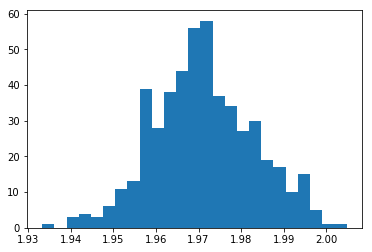

In [26]:
# histogram plot of the sample means
simdata_samplemeans_plot = plt.hist(simdata_samplemeans, 25, histtype='bar')
plt.show(simdata_samplemeans_plot)

In [48]:
# mean of the distribution of means
simdata_samplemeans_mean = np.mean(simdata_samplemeans)
simdata_samplemeans_std = np.std(simdata_samplemeans, ddof=1)

# saving the histogram data to an external file
#np.savetxt("histogramdata2.txt", )
print("Mean: ", simdata_samplemeans_mean)
print("Standard Deviation: ", simdata_samplemeans_std)

Mean:  1.97120146663
Standard Deviation:  0.0119344347961


## 3. Gaussian Distribution Overlay ##

**Normal/Gaussian** We define a method called **normalFunction(mean, std, x)**

In [28]:
def normalFunction(mean, std, x):
    y = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) )
    return(y)

**flattened simdata overlay** 

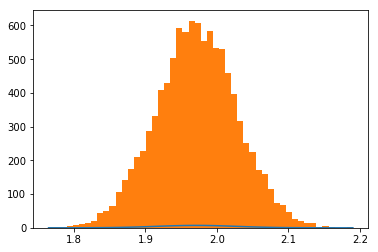

In [44]:
# getting data from flattened simdata and displaying Gaussian overlay
data1 = flatsimdata
x = np.linspace(min(data1), max(data1), num=100)
y = normalFunction(flatsimdata_mean, flatsimdata_std, x)
plt.plot(x,y)
flatsimdata_hist = plt.hist(flatsimdata, 50, histtype='bar')
plt.show()

**simdata_samplemeans overlay**

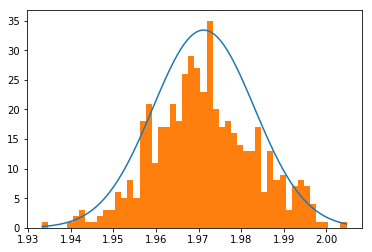

In [45]:
data2 = simdata_samplemeans
x = np.linspace(min(data2), max(data2), num=100)
y = normalFunction(simdata_samplemeans_mean, simdata_samplemeans_std, x)
plt.plot(x,y)
simdata_samplemeans_hist = plt.hist(simdata_samplemeans, 50, histtype='bar')
plt.show()

## 4. Comparison of Standard Deviations ##

The standard deviation of the distribution of measurments, flatsimdata_std, was 0.056453387857. The standard deviation of the distribution of results, simdata_samplemeans_std, was 0.011934434796054442. From the comparison, it is clear that simdata_samplemeans_std produces a more precise measurement of the standard deviation. flatsimdata_std is 4.73 times larger than simdata_samplemeans_std, approximately five times greater. 

In [54]:
factor = flatsimdata_std / simdata_samplemeans_std
factor

4.7302942134861761